In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

import seaborn as sns
sns.set()

# El yapimi Logistic Regresyon

`X` 
 - Ogrencilerin Vize ve Final notlari
 
`w`, `b` 
 - parametreler w = [0.5 0.5].T ve b = 10
 
Tahmin edilmek istenen `y`
 - `0.5 vize + 0.5 Final + 10 > 100` ise ogrenci geciyor, `y = True`

In [29]:
d = 2     # oznitelik sayisi
n = 100   # ornek sayisi

X = np.random.randint(0,100, size = (d,n))
w_gizli = np.ones((d,1))
b_gizli = 10
h = np.dot(w_gizli.T, X) + b_gizli
y = (h > 100) * 1

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['y']
veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
veri.shape

(100, 3)

In [30]:
veri.head()

,not0,not1,y
0,5,55,0
1,38,61,1
2,96,2,1
3,31,42,0
4,74,14,0


In [71]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iterasyon = 1000):
        
        #X = veri.iloc[:, :-1].values
        #X = (X - X.mean(axis = 0))/ (X.std(axis = 0)) # normallestirme
        
        #self.X = X.T
        #self.y = veri.iloc[:, -1:].values.T
        
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.rand(self.d,1) # rastgele d agirlik parametre degeri
        self.b = np.random.rand() # ratgeele 1 bias paarmetre degeri
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # ileri yayilim
            h = self.sigmoid(np.dot(self.w.T, self.X) + self.b)
            # geri yayilim
            dw = (1 / self.n) * np.dot(self.X, (h - self.y).T)
            db = (1 / self.n) * np.sum(h - self.y)
            # Egim Inis
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db

            if i%100:
                cost = (- 1 / self.n) * np.sum(self.y* np.log(h) + (1 - self.y) * (np.log(1 - h)))
                self.Js.append(cost)
                
    def predict(self, X):
        h = self.sigmoid(np.dot(self.w.T, X) + self.b)
        return 1 * (h > 0.5)
        

In [78]:
X = veri.iloc[:, :-1].values
X = (X - X.mean(axis = 0))/ (X.std(axis = 0)) # normallestirme

X = X.T
y = veri.iloc[:, -1:].values.T

In [95]:
cls = Classo(X, y , alpha =  0.0001, iterasyon = 1000000)
cls.fit()

In [96]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(cls.w.T))
print("\tb = {}".format(cls.b))

Buldugumuz parametre degerleri
	w = [[3.62034958 3.97049204]].T
	b = 0.5409337146135045


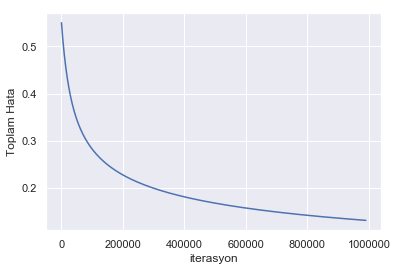

In [97]:
plt.plot(cls.Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

In [98]:
X_test = np.array([[0, 20,100],[0, 2,100]])
X_test

array([[  0,  20, 100],
       [  0,   2, 100]])

In [99]:
cls.predict(X_test)

array([[1, 1, 1]])

In [100]:
cls.sigmoid(cls.w.T.dot(X_test) + cls.b) > 0,5

(array([[ True,  True,  True]]), 5)